# Modeling

##### Aziz Maredia | DSIR-1019 | 01.27.21

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler

In [2]:
album = pd.read_csv('.././datasets/album_to_sort.csv')

In [3]:
user_tracks_reg = pd.read_csv('.././datasets/user_tracks_reg.csv')
album_tracks_reg = pd.read_csv('.././datasets/album_tracks_reg.csv')

user_tracks_pca = pd.read_csv('.././datasets/user_tracks_pca.csv')
album_tracks_pca = pd.read_csv('.././datasets/album_tracks_pca.csv')

tracks = pd.read_csv('.././datasets/combined_tracks.csv')

In [4]:
user_tracks_reg.drop(columns = ['track', 'artist', 'data_type'], inplace = True)
album_tracks_reg.drop(columns = ['track', 'artist', 'data_type'], inplace = True)

user_tracks_pca.drop(columns = ['track', 'artist', 'data_type'], inplace = True)
album_tracks_pca.drop(columns = ['track', 'artist', 'data_type'], inplace = True)

In [27]:
user_tracks_reg

,popularity_artist,popularity_song,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,...,release_date_2000s,release_date_60s,release_date_70s,release_date_80s,release_date_90s,release_date_Post_2010s,time_signature_1,time_signature_3,time_signature_4,time_signature_5
0,0.64,0.48,0.749,0.846,0.057350,0.0932,0.00403,0.005250,0.0382,0.532,...,0,0,0,0,0,1,0,0,1,0
1,0.57,0.60,0.815,0.661,0.136800,0.0996,0.10600,0.266000,0.2840,0.699,...,0,0,0,0,0,1,0,1,0,0
2,0.63,0.63,0.558,0.538,0.147550,0.0327,0.62900,0.019800,0.4240,0.254,...,0,0,0,0,0,1,0,0,1,0
3,0.66,0.67,0.816,0.492,0.124400,0.0752,0.43100,0.089600,0.0995,0.765,...,0,0,0,0,0,1,0,0,1,0
4,0.46,0.00,0.742,0.723,0.093667,0.0441,0.01370,0.001270,0.0610,0.927,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1519,0.71,0.12,0.880,0.821,0.042417,0.1180,0.01970,0.661000,0.2340,0.575,...,0,0,0,0,0,1,0,0,1,0
1520,0.50,0.23,0.710,0.678,0.121783,0.0479,0.58100,0.017100,0.0992,0.497,...,0,0,0,0,0,1,0,0,1,0
1521,0.86,0.52,0.614,0.814,0.162183,0.0515,0.29600,0.382000,0.0645,0.345,...,0,0,0,0,0,1,0,0,1,0
1522,0.50,0.60,0.674,0.678,0.140867,0.0406,0.59000,0.222000,0.0510,0.465,...,0,0,0,0,0,1,0,0,1,0


In [5]:
def cluster_user_tracks():
        
    dfs = [('regular', user_tracks_reg), ('pca', user_tracks_pca)]
    results = {'data':[], 'n_clusters':[], 'silhouette_score':[]}
    
    for df in dfs:
        
        X = df[1]
        
        for k in range(3,13):
            
            km = KMeans(n_clusters = k, random_state = 42) #init #algorithm
            km.fit(X)
            ss = silhouette_score(X, km.labels_)

            results['data'] = results['data'] + [df[0]]
            results['n_clusters'] = results['n_clusters'] + [k]
            results['silhouette_score'] = results['silhouette_score'] + [ss]
    
    optimal_k = results['n_clusters'][results['silhouette_score'].index(max(results['silhouette_score']))]
    
    if results['data'][results['silhouette_score'].index(max(results['silhouette_score']))] == 'pca':
        optimal_data = user_tracks_pca
    else:
        optimal_data = user_tracks_reg
    
    km = KMeans(n_clusters = optimal_k, random_state = 42)
    best_model = km.fit(optimal_data)
    cluster_labels = km.labels_
    
    return pd.DataFrame(results), best_model
                

In [6]:
km_tests, model = cluster_user_tracks()

In [7]:
tracks = pd.concat([tracks, pd.DataFrame(model.labels_)], axis = 1).rename(columns = {0:'cluster'})

In [8]:
cluster_tracks = tracks.groupby(by = 'cluster').mean()[['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence']].reset_index(level = 0)

In [9]:
km_tests

,data,n_clusters,silhouette_score
0,regular,3,0.155822
1,regular,4,0.154504
2,regular,5,0.137952
3,regular,6,0.097600
4,regular,7,0.100335
5,regular,8,0.106443
6,regular,9,0.091504
7,regular,10,0.101255
8,regular,11,0.113042
9,regular,12,0.116134


In [10]:
cluster_tracks

,cluster,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence
0,0.0,0.604272,0.660054,0.050865,0.253871,0.071221,0.181299,0.603304
1,1.0,0.721163,0.609173,0.211436,0.188690,0.004046,0.192016,0.425995
2,2.0,0.608458,0.726643,0.072318,0.118180,0.158842,0.195748,0.382673
3,3.0,0.636563,0.623043,0.081685,0.208499,0.332028,0.189334,0.443773
4,4.0,0.614612,0.591826,0.081901,0.220489,0.218126,0.180137,0.420008
5,5.0,0.686930,0.676513,0.222451,0.182272,0.002342,0.239369,0.470107
6,6.0,0.734156,0.631102,0.175021,0.154803,0.007127,0.181460,0.463177
7,7.0,0.596199,0.638596,0.061603,0.223971,0.105492,0.178648,0.451673
8,8.0,0.623908,0.784704,0.095286,0.064691,0.162480,0.215420,0.390370
9,9.0,0.671060,0.627887,0.221958,0.193506,0.023675,0.220783,0.435111


In [24]:
# Libraries
import matplotlib.pyplot as plt
import pandas as pd
from math import pi, ceil
 
def make_radar(row, title, color, dframe, num_clusters):
    # number of variable
    categories=list(dframe)[1:]
    N = len(categories)
    
    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    
    # Initialise the radar plot
    ax = plt.subplot(4, ceil(num_clusters/4), row+1, polar = True)
    
    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=14)

    # Draw ylabels
    ax.set_rlabel_position(1)
    plt.yticks([0.2,0.4,0.6,0.8], ["0.2","0.4","0.6","0.8"], color="grey", size=8)
    plt.ylim(0,1)

    # Ind1
    values=dframe.loc[row].drop('cluster').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)

    # Add a title
    plt.title(title, size=12, color='white', y=1.06)

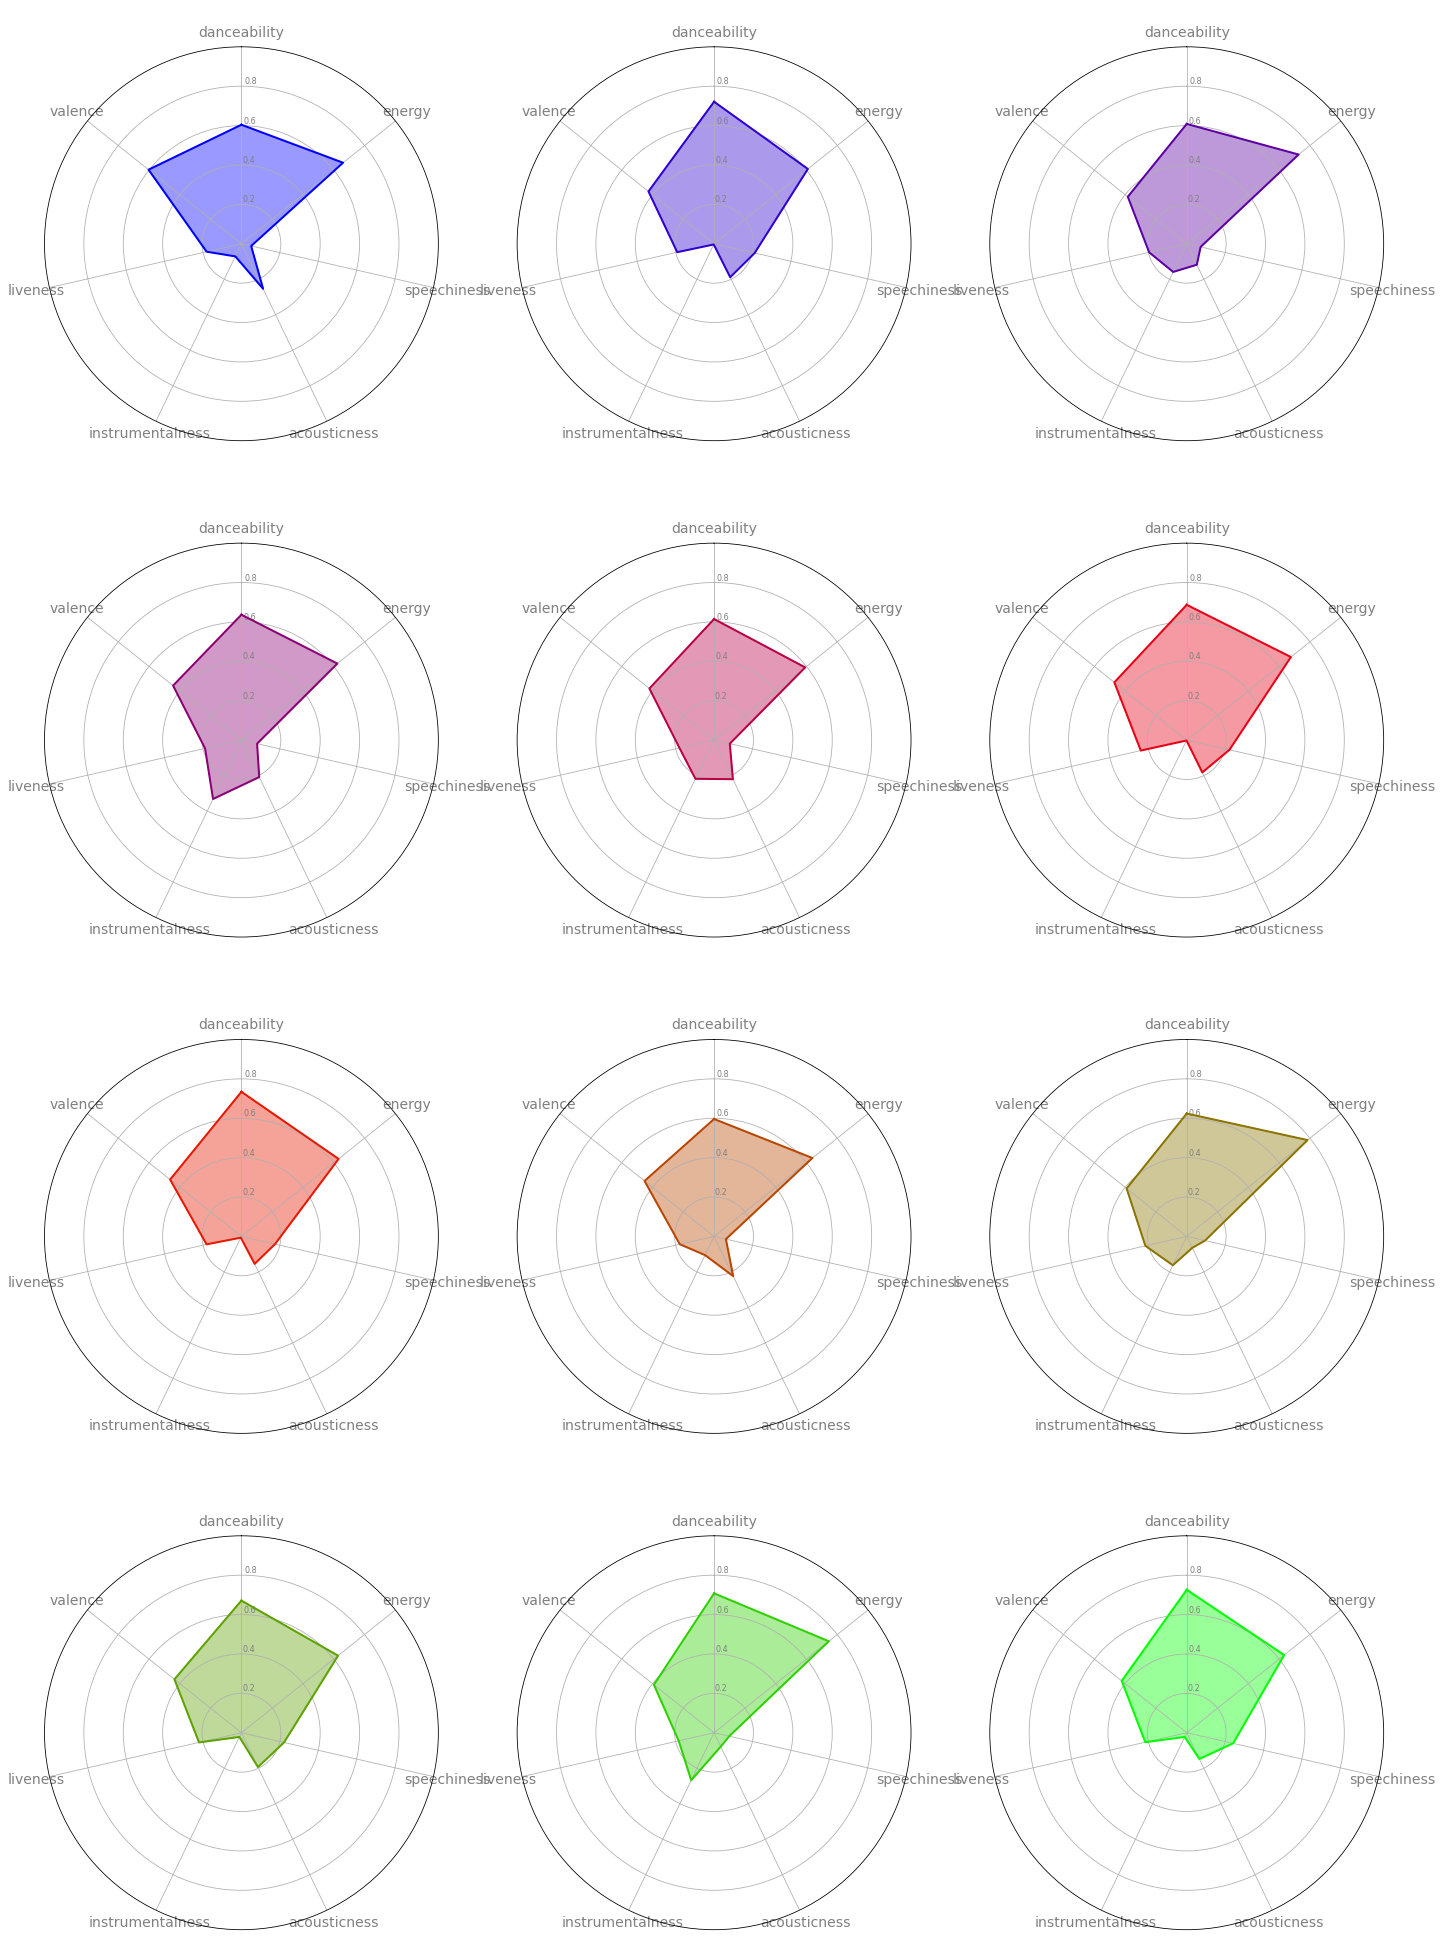

In [25]:
# initialize the figure
plt.figure(figsize=(24,35))
 
# Create a color palette:
my_palette = plt.cm.get_cmap("brg", len(cluster_tracks.index))

# Loop to plot
for row in range(0, len(cluster_tracks.index)):
    make_radar(row = row, 
               title = 'Cluster ' + str(cluster_tracks['cluster'][row]), 
               color = my_palette(row), 
               dframe = cluster_tracks, 
               num_clusters = len(cluster_tracks.index))

In [13]:
cluster_genres = tracks.groupby(by = 'cluster').mean()[[i for i in tracks.columns if 'genre' in i]].T

In [14]:
top_genres_dict = {}

for i in cluster_genres.columns:
    top_genres = cluster_genres[i].sort_values(ascending = False)[:3].index
    top_genres_dict[i] = top_genres
    

In [15]:
pd.DataFrame(top_genres_dict).T

""
0.0
1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0


<AxesSubplot:xlabel='n_clusters', ylabel='silhouette_score'>

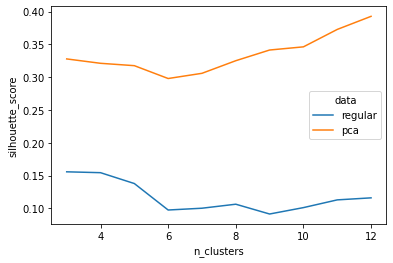

In [16]:
sns.lineplot(x = km_tests['n_clusters'], y = km_tests['silhouette_score'], hue = km_tests['data'])

In [17]:
def sort_album(album):
    
    km_tests, model = cluster_user_tracks()
    
    centroids_df = pd.DataFrame(model.cluster_centers_, 
                                columns = [f'PCA {i}' for i in range(1, len(pd.DataFrame(model.cluster_centers_).columns) + 1)],
                                index = [f'Cluster {i}' for i in range(1, len(pd.DataFrame(model.cluster_centers_).index) + 1)])
    
    similarity_df = pd.DataFrame(cosine_similarity(np.array(album_tracks_pca), model.cluster_centers_), index = album['track'], columns = centroids_df.index)
    
    optimal_cluster_df = pd.DataFrame(similarity_df.mean()).rename(columns = {0:'mean_cosine_sim'}).sort_values(by = 'mean_cosine_sim', ascending = False)
    
    song_scores = pd.DataFrame(similarity_df[similarity_df.mean().sort_values(ascending = False).index[0]])
    column_name = list(song_scores.columns)[0]
    song_scores.rename(columns = {column_name: 'optimal_cluster'}, inplace = True)
    
    album = album.set_index('track')
    
    sorted_album = pd.concat([album, song_scores], axis = 1).sort_values(by = 'optimal_cluster', ascending = False)

    return centroids_df, similarity_df, optimal_cluster_df, sorted_album

In [18]:
centroids, similarity_df, optimal_cluster_df, sorted_album = sort_album(album)

In [19]:
centroids

,PCA 1,PCA 2,PCA 3,PCA 4,PCA 5,PCA 6
Cluster 1,-0.137880,1.038426,0.576913,0.472816,-0.688992,0.165318
Cluster 2,-0.715336,-0.807570,-0.091424,0.596825,0.015383,-0.084486
Cluster 3,1.244819,-0.252793,0.473896,-0.308590,0.027698,-0.058722
Cluster 4,0.009303,0.578606,-0.755138,0.300858,0.186010,0.065872
Cluster 5,-0.077371,0.831387,-0.053380,-0.377980,0.301720,-0.041443
Cluster 6,-0.882302,-0.018407,0.025525,-0.553398,-0.122901,-0.241010
Cluster 7,-0.696695,-0.571626,0.610217,-0.083231,0.068202,-0.293069
Cluster 8,0.076298,0.383507,0.493967,0.574069,0.196226,-0.040425
Cluster 9,1.259268,-0.561728,-0.227268,0.358565,-0.028018,0.065541
Cluster 10,-0.849610,-0.284122,-0.700881,0.075763,-0.197784,0.009426


In [23]:
similarity_df

,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5,Cluster 6,Cluster 7,Cluster 8,Cluster 9,Cluster 10,Cluster 11,Cluster 12
track,,,,,,,,,,,,
Beautiful Trip,-0.271456,0.647431,-0.814206,0.301043,-0.190391,0.581432,0.231359,-0.522137,-0.408870,0.993675,-0.185958,0.313296
Tequila Shots,-0.276104,0.713664,-0.812065,0.215229,-0.267074,0.587726,0.308843,-0.508033,-0.411233,0.994940,-0.253009,0.397147
Another Day,-0.308209,0.708754,-0.815645,0.210985,-0.241604,0.607395,0.323872,-0.518394,-0.431359,0.993488,-0.256584,0.428337
She Knows This,-0.317810,0.702237,-0.810631,0.216196,-0.237685,0.606266,0.316364,-0.528043,-0.425689,0.993458,-0.242895,0.421152
Dive,-0.280922,0.696669,-0.829611,0.207233,-0.215988,0.635821,0.336224,-0.509205,-0.465362,0.993032,-0.271840,0.430507
Damaged,-0.175994,0.345204,-0.577704,-0.297509,0.105783,0.987031,0.681517,-0.471617,-0.790517,0.605981,-0.354450,0.687679
Heaven On Earth,-0.156377,0.289585,-0.542295,-0.300136,0.172545,0.990606,0.687675,-0.418333,-0.805706,0.539095,-0.354382,0.623388
Show Out (with Skepta & Pop Smoke),-0.110366,0.247137,-0.514203,-0.237253,0.081022,0.728103,0.446903,-0.444963,-0.666582,0.515045,-0.313072,0.951854
"Solo Dolo, Pt. III",-0.285205,0.710766,-0.801629,0.186950,-0.272442,0.606772,0.327329,-0.527417,-0.417026,0.992714,-0.247880,0.413490


In [21]:
optimal_cluster_df

,mean_cosine_sim
Cluster 10,0.849844
Cluster 6,0.715781
Cluster 2,0.561070
Cluster 12,0.524225
Cluster 7,0.413023
Cluster 4,0.055434
Cluster 5,-0.108856
Cluster 1,-0.232571
Cluster 11,-0.285092
Cluster 8,-0.490380


In [22]:
sorted_album

,duration_ms,track_id,spotify_link,preview,optimal_cluster
track,,,,,
Sept. 16,249040,3Uw2se3aQU1UFrpRBvBnB4,https://open.spotify.com/track/3Uw2se3aQU1UFrp...,https://p.scdn.co/mp3-preview/62578afedb81632e...,0.996532
Tequila Shots,193293,30KctD1WsHKTIYczXjip5a,https://open.spotify.com/track/30KctD1WsHKTIYc...,https://p.scdn.co/mp3-preview/eea2485b714dffab...,0.994940
Rockstar Knights (with Trippie Redd),231467,4J9SI7do4KOEsCexqEbjmR,https://open.spotify.com/track/4J9SI7do4KOEsCe...,https://p.scdn.co/mp3-preview/d0610339176bd8c2...,0.993692
Beautiful Trip,37013,4IIuCotvqijraSdnVLaFnM,https://open.spotify.com/track/4IIuCotvqijraSd...,https://p.scdn.co/mp3-preview/05edcc06fc085a58...,0.993675
Sad People,176027,4nuAslShoN77tq12fzwjUq,https://open.spotify.com/track/4nuAslShoN77tq1...,https://p.scdn.co/mp3-preview/a2e8a2ffade8b892...,0.993584
Another Day,199787,6myUpr3GDR80Dg3zqNTmmG,https://open.spotify.com/track/6myUpr3GDR80Dg3...,https://p.scdn.co/mp3-preview/0270d8150fcbd742...,0.993488
She Knows This,216560,1xzUQMiCoY5pdego0pHMeV,https://open.spotify.com/track/1xzUQMiCoY5pdeg...,https://p.scdn.co/mp3-preview/29dc43127abc4fde...,0.993458
Dive,148707,7Hc3YL8oDiAzbiAW32KXrw,https://open.spotify.com/track/7Hc3YL8oDiAzbiA...,https://p.scdn.co/mp3-preview/89e0c1d79d7d17f4...,0.993032
"Solo Dolo, Pt. III",242267,27oVCAziETRbNuo5A8LNpg,https://open.spotify.com/track/27oVCAziETRbNuo...,https://p.scdn.co/mp3-preview/c461629a7f1acf31...,0.992714
